# Data Visualisation
* performed on training set
* in case of large training set, we sample examples to form exploration set
* Enables to undetstand features and their relationship among themselves and with output labels

I our case we have a small training set and we will use it all for data exploration and there is no need to create exploration set

Its a good idea to create a copy of the exploration set so that we can freely manipulate the data without worrying about any manipulatino in the original set

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(data_url, sep=";")

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["quality"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [ ]:
exploration_set = strat_train_set.copy()

### Scatter visualization

with seaborn library:

<Axes: xlabel='fixed acidity', ylabel='density'>

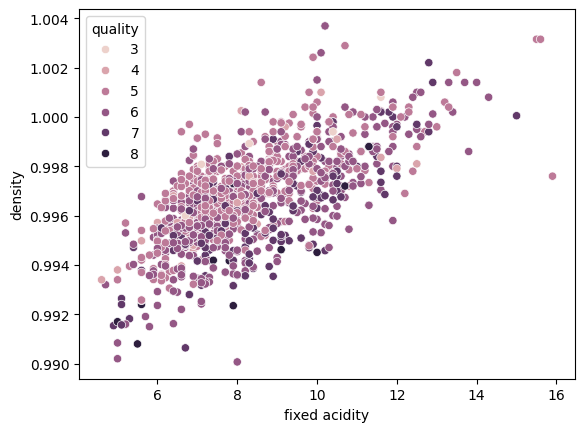

In [ ]:
sns.scatterplot(x='fixed acidity', y='density', hue="quality", data=exploration_set)

with matplotlib:

<Axes: xlabel='fixed acidity', ylabel='density'>

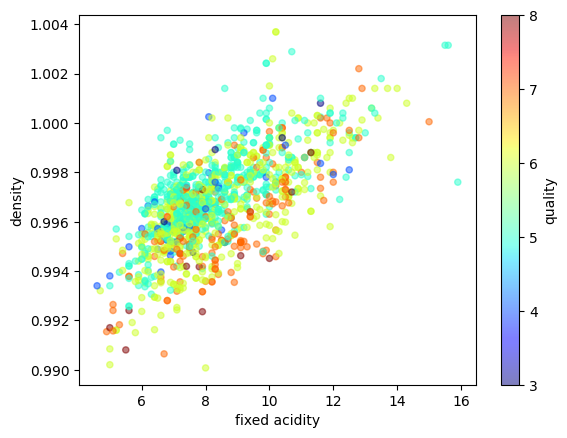

In [ ]:
exploration_set.plot(kind="scatter", x="fixed acidity", y="density", alpha=0.5, c="quality", cmap=plt.get_cmap("jet"))

### Relationship between features
* **standard correlation** between two features which ranges from -1 to +1
    * correlation = +1 -> strong positive correlation between features
    * correlation = -1 -> strong negative correlation between features
    * correlation = 0 -> no correlation between features
* visualizatin using heat map
* this only captures linear relationship between features
    * for non linear relationship use **rank correlation**

In [ ]:
corr_matrix = exploration_set.corr()

corr_matrix["quality"]

,quality
fixed acidity,0.107940
volatile acidity,-0.383249
citric acid,0.210802
residual sugar,0.003710
chlorides,-0.120231
free sulfur dioxide,-0.048291
total sulfur dioxide,-0.194511
density,-0.193009
pH,-0.052063
sulphates,0.228050


Lets visulize `corr_matrix` using heat map

<Axes: >

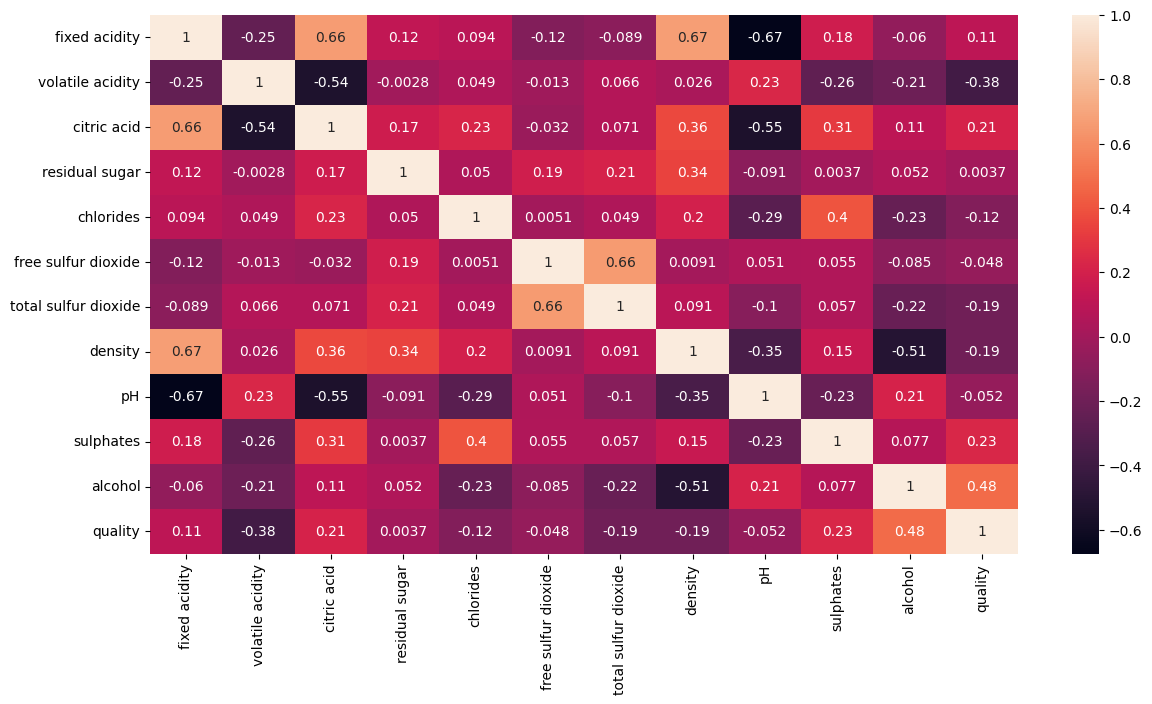

In [ ]:
plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True)